In [1]:
import matplotlib.pyplot as plt
import numpy as np

Total decays: 1000000
Detected decays: 849827 (85.0% efficiency)
Missed decays: 150173


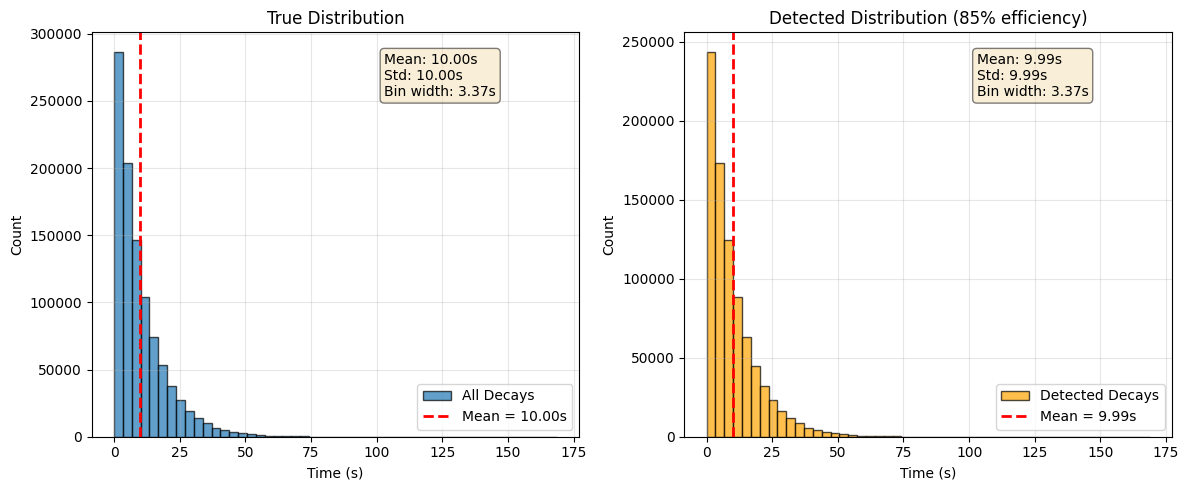

In [9]:

def apply_detector_efficiency(decay_times, efficiency=0.8):
    """
    Simulate detector that only catches some particles.
    
    Parameters:
    - decay_times: array of decay times
    - efficiency: probability of detecting each decay (0 to 1)
    """
    # Random detection: each particle has 'efficiency' chance of being detected
    detected = np.random.random(len(decay_times)) < efficiency
    detected_times = decay_times[detected]
    
    print(f"Total decays: {len(decay_times)}")
    print(f"Detected decays: {len(detected_times)} ({efficiency*100}% efficiency)")
    print(f"Missed decays: {len(decay_times) - len(detected_times)}")
    
    return detected_times
N = 1_000_000  # Number of particles
decay_constant = 0.1  # Lambda (per second)

decay_times = np.random.exponential(scale=1/decay_constant, size=N)  # Simulated decay times

# Example
detected_decays = apply_detector_efficiency(decay_times, efficiency=0.85)

# Compare detected vs true distribution
plt.figure(figsize=(12, 5))

# Calculate statistics
mean_all = np.mean(decay_times)
std_all = np.std(decay_times)
mean_detected = np.mean(detected_decays)
std_detected = np.std(detected_decays)

plt.subplot(1, 2, 1)
plt.hist(decay_times, bins=50, alpha=0.7, edgecolor='black', label='All Decays')
plt.axvline(mean_all, color='red', linestyle='--', linewidth=2, label=f'Mean = {mean_all:.2f}s')
plt.xlabel('Time (s)')
plt.ylabel('Count')
plt.title('True Distribution')
plt.grid(True, alpha=0.3)
plt.text(0.6, 0.95, f'Mean: {mean_all:.2f}s\nStd: {std_all:.2f}s\nBin width: {(decay_times.max()-decay_times.min())/50:.2f}s', 
         transform=plt.gca().transAxes, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(detected_decays, bins=50, alpha=0.7, color='orange', edgecolor='black', label='Detected Decays')
plt.axvline(mean_detected, color='red', linestyle='--', linewidth=2, label=f'Mean = {mean_detected:.2f}s')
plt.xlabel('Time (s)')
plt.ylabel('Count')
plt.title('Detected Distribution (85% efficiency)')
plt.grid(True, alpha=0.3)
plt.text(0.6, 0.95, f'Mean: {mean_detected:.2f}s\nStd: {std_detected:.2f}s\nBin width: {(detected_decays.max()-detected_decays.min())/50:.2f}s', 
         transform=plt.gca().transAxes, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.legend()

plt.tight_layout()
plt.show()


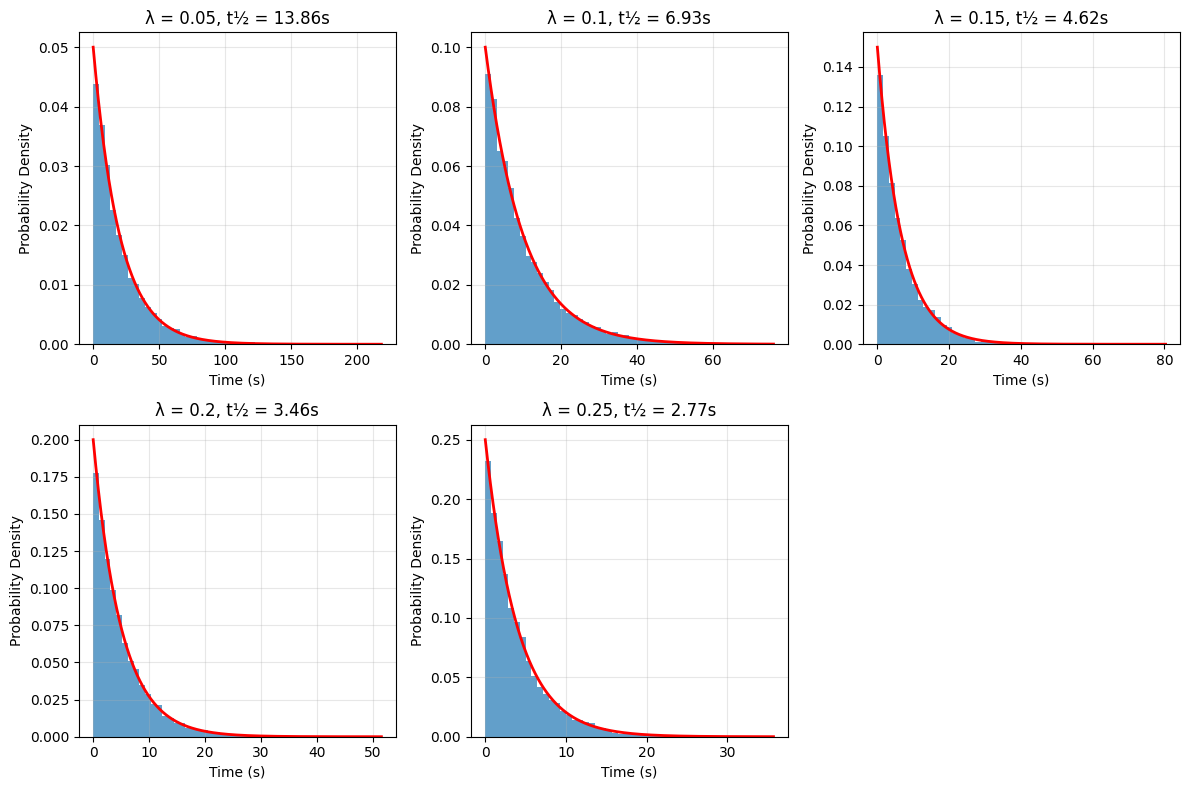

In [ ]:
def scan_decay_constants():
    """
    Run simulation for multiple decay constants.
    """
    decay_constants = [0.05, 0.1, 0.15, 0.2, 0.25]
    N = 10000
    
    plt.figure(figsize=(12, 8))
    
    for i, lam in enumerate(decay_constants, 1):
        decay_times = np.random.exponential(scale=1/lam, size=N)
        
        plt.subplot(2, 3, i)
        plt.hist(decay_times, bins=50, density=True, alpha=0.7)
        
        # Overlay theoretical distribution for exponential decay
        t = np.linspace(0, max(decay_times), 1000)
        # Theoretical PDF: f(t) = λ * exp(-λt)
        theoretical = lam * np.exp(-lam * t)
        plt.plot(t, theoretical, 'r-', linewidth=2)
        
        plt.title(f'λ = {lam}, t½ = {0.693/lam:.2f}s')
        plt.xlabel('Time (s)')
        plt.ylabel('Probability Density')
        plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

scan_decay_constants()